In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from array import array
import time
import scipy.stats as st
import seaborn as sns
import pandas as pd
import math
import pickle

In [2]:
from TypicalMH import MH 
from TypicalMH import APMHT
from TypicalMH import Conf 
from TypicalMH import MiniMH

In [3]:
def logpior(theta):
    #先验分布 均值为0 协方差矩阵为单位阵的多元正态分布取对数
    return np.log(st.multivariate_normal.pdf(theta,mean=np.zeros(d), cov=np.eye(d)).transpose())

def loglik(i,data,theta):
    x=data[:,:d]
    z=data[:,d].reshape((data.shape[0],1))
    l=1/(1+np.exp(-x[i,:].dot(theta)))
    out=np.power(l,z[i,:].transpose())*np.power((1-l),(1-z[i,:]).transpose())
    return np.log(out.transpose())

In [4]:
#parameters theta
n=1000
d=20
T=1000
np.random.seed(0)
theta=np.random.normal(0, 1, d)
print(theta)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


In [5]:
#data
x=np.zeros((n,d))
for i in range(d):
    x[:,i]=np.random.normal(0, 1, n)

pr=1/(1+np.exp(-x.dot(theta)))
y=np.random.binomial(n=1, p=pr, size=n) 
y=y.reshape(y.shape[0],1)
data=np.hstack((x,y))

In [6]:
tn=MH(data,T,theta,logpior, loglik)

0.5495486259460449


In [88]:
np.mean(tn,axis=1)

array([ 1.90502907,  0.31871716,  0.95630595,  2.08368302,  1.95214215,
       -1.14765119,  1.10656475, -0.0493927 , -0.17693174,  0.49916374,
        0.10556695,  1.57714148,  0.73532999,  0.13053858,  0.27318021,
        0.42366324,  1.57448535, -0.41395086,  0.09628628, -0.74502736])

In [89]:
ep=0.05
m=100
theta_ini=theta

In [90]:
tnA,nleA=APMHT(data, T, ep, m, theta_ini,logpior,loglik)

0.5567357540130615
108700


In [91]:
np.mean(tnA,axis=1)

array([ 1.87770391,  0.39441439,  0.98003736,  2.03902126,  1.86921458,
       -1.05600415,  1.22181906,  0.03162291, -0.03536346,  0.45276529,
       -0.26434321,  1.53935995,  0.76279679,  0.20781349,  0.17515279,
        0.47058706,  1.48416589, -0.42786173,  0.04521756, -0.67669902])

In [92]:
tnC,nleC=Conf(data,T,m,theta_ini,logpior,loglik)

2.616469621658325
1000000


In [94]:
np.mean(tnC,axis=1)

array([ 1.79111579,  0.3318352 ,  0.91764513,  1.93010558,  1.82589221,
       -1.03200205,  1.05061913, -0.0579685 , -0.14881109,  0.41427215,
        0.13622557,  1.44832612,  0.69304048,  0.03755004,  0.24596582,
        0.4228526 ,  1.45925109, -0.33839564,  0.09428117, -0.67536071])

In [93]:
tnM,nleM=MiniMH(data,T,m,theta_ini,logpior,loglik)

0.48309755325317383
full_N_time: 0
num_Xc: 1000


In [95]:
np.mean(tnM,axis=1)

array([ 1.39270332,  0.21165506,  0.70375084,  1.54923283,  1.53205858,
       -0.94601337,  0.86159705, -0.08891308,  0.02297082,  0.35538841,
       -0.1490487 ,  1.20530816,  0.27714437,  0.10162669, -0.04956668,
        0.32321244,  0.87393579, -0.28478252, -0.1332811 , -0.48567139])

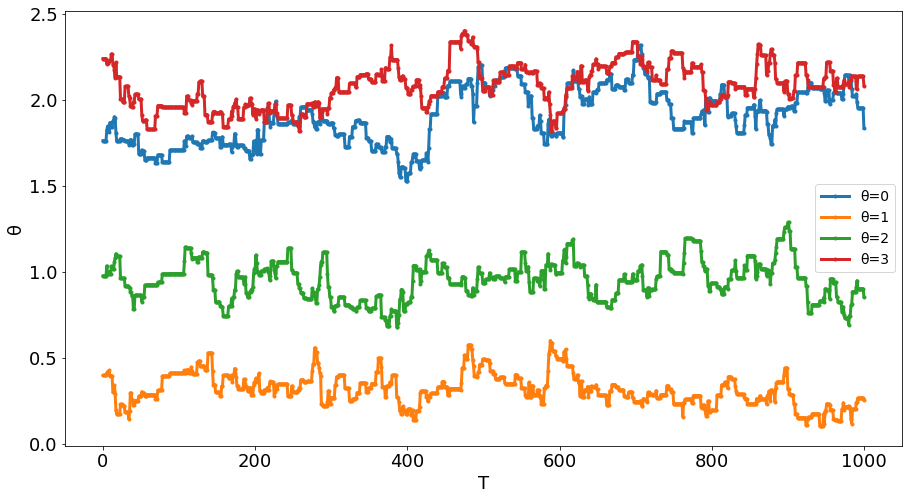

In [7]:
#theta的游程图
xp=np.arange(T+1)
plt.figure(figsize=(15, 8))
for i in range(4):
    plt.plot(xp,tn[i].transpose(),label='θ='+str(i), linewidth=3,marker='o',markersize=3)
plt.xticks(size=18)
plt.xlabel('T',fontsize=18)
plt.yticks(size=18)
plt.ylabel('θ',fontsize=18)
plt.legend(fontsize=14)

In [8]:
from PMMINMethod import clustering 
from PMMINMethod import generateB
from PMMINMethod import PMMIN 

In [9]:
data[np.where(data[:,d]==1),d]=100
data[np.where(data[:,d]==0),d]=-100

outk,outz,C=clustering(data,4.8)
for k in range(outk):
    outz[d,k]= 1 if outz[d,k]==100 else 0

data[np.where(data[:,d]==100),d]=1
data[np.where(data[:,d]==-100),d]=0
print(outk)

247


In [10]:
B=generateB(data,outk,outz,C)

In [18]:
def logpriorN(theta):
    #先验分布 均值为0 协方差矩阵为单位阵的多元正态分布取对数
    return np.log(st.multivariate_normal.pdf(theta,mean=np.zeros(d), cov=np.eye(d)))



def Sigmoid(x):
    return 1/(1+np.exp(-x))

def firstDerivSigmoid(x):
    return Sigmoid(x)*(1-Sigmoid(x))

def secondDerivSigmoid(x):
    return Sigmoid(x)*(1-Sigmoid(x))*(1-2*Sigmoid(x))

def loglikN(data,theta):
    
    return np.log(1-Sigmoid(data[:d].dot(theta)))+data[d]*(data[:d].dot(theta))

def gradient_llik(data,theta):
    
    return np.hstack(((-firstDerivSigmoid(data[:d].dot(theta))/(1-Sigmoid(data[:d].dot(theta))) + data[d])*theta , data[:d].dot(theta)))

def hessian_llik(data,theta):
    H=np.zeros((d+1,d+1))
    H[d,d]=0
    H[d,:d]=theta
    H[:d,d]=theta
    H[:d,:d]=(-firstDerivSigmoid(data[:d].dot(theta))**2/(1-Sigmoid(data[:d].dot(theta)))**2-secondDerivSigmoid(data[:d].dot(theta))/(1-Sigmoid(data[:d].dot(theta))))*theta.reshape(d,1).dot(theta.reshape(1,d))
    return H

In [14]:
m=200
tnP=PMMIN(data,outz,outk,C,m,T, theta ,B, logpriorN,loglikN,gradient_llik,hessian_llik)

87.28297519683838


In [15]:
np.mean(tnP,axis=1)

array([ 1.18377599,  0.15217361,  0.63135549,  1.35706752,  1.22061053,
       -0.66460692,  0.72111492, -0.01377942, -0.00617369,  0.24141655,
        0.03336702,  1.0509396 ,  0.57841103,  0.10704249,  0.17487013,
        0.23128516,  1.02424959, -0.32096938, -0.02833362, -0.46063803])

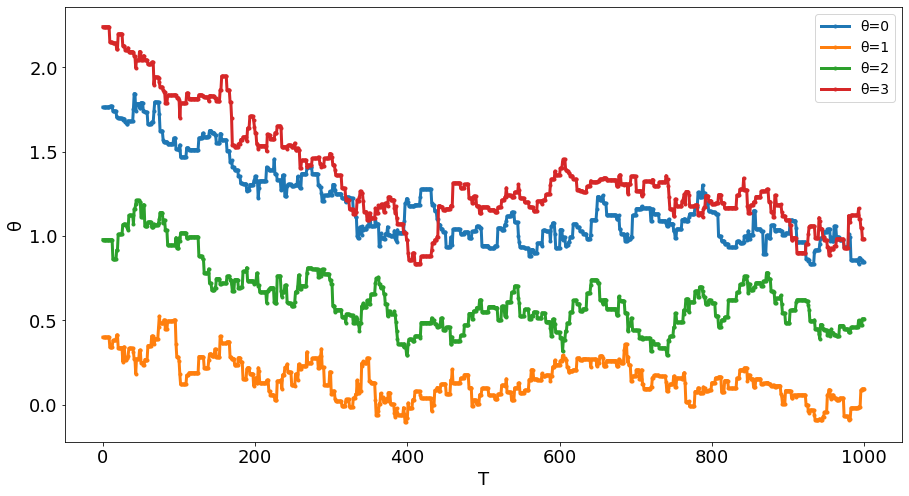

In [16]:
#theta的游程图
xp=np.arange(T+1)
plt.figure(figsize=(15, 8))
for i in range(4):
    plt.plot(xp,tnP[i].transpose(),label='θ='+str(i), linewidth=3,marker='o',markersize=3)
plt.xticks(size=18)
plt.xlabel('T',fontsize=18)
plt.yticks(size=18)
plt.ylabel('θ',fontsize=18)
plt.legend(fontsize=14)